<a href="https://colab.research.google.com/github/AG-2002/Customer-Segmentation-and-Prediction-of-Term-Deposit-Subscriptions-in-Bank-Marketing/blob/main/Bank_Data(Logistic_Fitting).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv('bank-additional-full.csv')
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
month_to_number = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

# Map month names to numbers
df1['month'] = df1['month'].map(month_to_number)

In [5]:
day_to_number = {
    'mon': 1,
    'tue': 2,
    'wed': 3,
    'thu': 4,
    'fri': 5,
    'sat': 6,
    'sun': 7
}

# Map month names to numbers
df1['day_of_week'] = df1['day_of_week'].map(day_to_number)

In [6]:
df1[df1.duplicated(keep=False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,5,4,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,5,4,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,7,4,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,7,4,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,7,1,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,7,1,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,7,4,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,7,4,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,7,4,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,7,4,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [7]:
df1=df1.drop_duplicates()

In [8]:
label=LabelEncoder()
df1['y']=label.fit_transform(df1['y'])
label_dict = dict(zip(label.classes_, label.transform(label.classes_)))
print(label_dict)

{'no': np.int64(0), 'yes': np.int64(1)}


# ----------  One Hot Encoding  ----------

In [9]:
def convert_pdays(value):
    if value == 999:
        return 'Never Contacted'
    elif value <= 7:
        return 'recently contacted'
    elif 8 <= value <= 30:
        return 'sometimes ago'
    else:
        return 'long ago'

df1['pdays_new'] = df1['pdays'].apply(convert_pdays)

In [10]:
df1.drop('pdays', axis=1, inplace=True)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  int64  
 9   day_of_week     41176 non-null  int64  
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  previous        41176 non-null  int64  
 13  poutcome        41176 non-null  object 
 14  emp.var.rate    41176 non-null  float64
 15  cons.price.idx  41176 non-null  float64
 16  cons.conf.idx   41176 non-null  float64
 17  euribor3m       41176 non-null  floa

In [12]:
# Separate features and target
target = df1["y"]
features = df1.drop("y", axis=1)

# Identify categorical and numerical columns
categorical_cols = features.select_dtypes(include=["object"]).columns
numerical_cols = features.drop(columns=categorical_cols)

# One-hot encode categorical columns and convert to int (0/1)
encoded_cats = pd.get_dummies(features[categorical_cols], drop_first=True).astype(int)

# Combine numerical + encoded
X_encoded = pd.concat([numerical_cols, encoded_cats], axis=1)

# add target back
df_final = pd.concat([X_encoded, target], axis=1)
print(df_final.head())

   age  month  day_of_week  duration  campaign  previous  emp.var.rate  \
0   56      5            1       261         1         0           1.1   
1   57      5            1       149         1         0           1.1   
2   37      5            1       226         1         0           1.1   
3   40      5            1       151         1         0           1.1   
4   56      5            1       307         1         0           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  ...  housing_unknown  \
0          93.994          -36.4      4.857  ...                0   
1          93.994          -36.4      4.857  ...                0   
2          93.994          -36.4      4.857  ...                0   
3          93.994          -36.4      4.857  ...                0   
4          93.994          -36.4      4.857  ...                0   

   housing_yes  loan_unknown  loan_yes  contact_telephone  \
0            0             0         0                  1   
1            0    

In [13]:
df_final.columns

Index(['age', 'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'poutcome_nonexistent',
       'poutcome_success', 'pdays_new_recently contacted',
       'pdays_new_sometimes ago', 'y'],
      dtype='object')

In [14]:
df_final.to_csv('bank_data_cleaned.csv',index=False)

In [15]:
df=pd.read_csv('bank_data_cleaned.csv')
df.head()

,age,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success,pdays_new_recently contacted,pdays_new_sometimes ago,y
0,56,5,1,261,1,0,1.1,93.994,-36.4,4.857,...,0,0,0,0,1,1,0,0,0,0
1,57,5,1,149,1,0,1.1,93.994,-36.4,4.857,...,0,0,0,0,1,1,0,0,0,0
2,37,5,1,226,1,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,1,1,0,0,0,0
3,40,5,1,151,1,0,1.1,93.994,-36.4,4.857,...,0,0,0,0,1,1,0,0,0,0
4,56,5,1,307,1,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,1,1,0,0,0,0


# **--------  Logistic Regression  --------**

Check if the assumptions of the multiple logistic regression satisfies



1.   Binary outcome



In [16]:
df['y'].unique()

array([0, 1])

2. No multicollinearity among explanatory variables.



In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop('y', axis=1)
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif[vif['Feature'] != 'const']
print(vif[vif['VIF'] > 10])

                         Feature           VIF
0                            age  2.642265e+01
1                          month  2.258891e+01
6                   emp.var.rate  4.137239e+01
7                 cons.price.idx  3.524204e+04
8                  cons.conf.idx  1.261605e+02
9                      euribor3m  3.592547e+02
10                   nr.employed  4.004177e+04
34               housing_unknown           inf
36                  loan_unknown           inf
39          poutcome_nonexistent  3.776616e+01
40              poutcome_success  1.301915e+01
41  pdays_new_recently contacted  1.257112e+01


REMOVE MULTICOLLINEARITY

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

def compute_vif(X):
    X = sm.add_constant(X)
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data[vif_data["Feature"] != "const"].sort_values(by="VIF", ascending=False)

X = df.drop(columns=['y'])

drop_order = [
    'nr.employed','housing_unknown', 'emp.var.rate','poutcome_success', 'cons.price.idx', 'cons.conf.idx',
    'loan_unknown', 'poutcome_nonexistent',
    'pdays_new_recently contacted', 'age'
]

for col in drop_order:
    if col in X.columns:
        X.drop(columns=col, inplace=True)
        vif = compute_vif(X)
        print(f"Dropped: {col}")
        print(vif.head())
        if all(vif["VIF"] < 10):
            print("All VIFs below 10. Multicollinearity removed.")
            break

Dropped: nr.employed
             Feature        VIF
34   housing_unknown        inf
36      loan_unknown        inf
7       emp.var.rate  47.116362
10         euribor3m  40.164740
40  poutcome_success  12.581897
Dropped: housing_unknown
                         Feature        VIF
7                   emp.var.rate  47.116362
10                     euribor3m  40.164740
39              poutcome_success  12.581897
40  pdays_new_recently contacted  12.218424
6                       previous   5.975126
Dropped: emp.var.rate
                         Feature        VIF
38              poutcome_success  12.568401
39  pdays_new_recently contacted  12.198720
6                       previous   5.934629
37          poutcome_nonexistent   5.117649
29   education_university.degree   4.168104
Dropped: poutcome_success
                        Feature       VIF
6                      previous  5.470544
37         poutcome_nonexistent  4.839721
29  education_university.degree  4.167971
9                 

In [19]:
# Combine back with target variable
target = df["y"]
df_no_multicollinearity = pd.concat([X, target], axis=1)

output_file = "bank_data_no_multicollinearity.csv"
df_no_multicollinearity.to_csv(output_file, index=False)
print(f"\n Cleaned dataset saved as: {output_file}")


 Cleaned dataset saved as: bank_data_no_multicollinearity.csv


In [20]:
df=pd.read_csv('bank_data_no_multicollinearity.csv')
df.head()

,age,month,day_of_week,duration,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m,job_blue-collar,...,default_unknown,default_yes,housing_yes,loan_unknown,loan_yes,contact_telephone,poutcome_nonexistent,pdays_new_recently contacted,pdays_new_sometimes ago,y
0,56,5,1,261,1,0,93.994,-36.4,4.857,0,...,0,0,0,0,0,1,1,0,0,0
1,57,5,1,149,1,0,93.994,-36.4,4.857,0,...,1,0,0,0,0,1,1,0,0,0
2,37,5,1,226,1,0,93.994,-36.4,4.857,0,...,0,0,1,0,0,1,1,0,0,0
3,40,5,1,151,1,0,93.994,-36.4,4.857,0,...,0,0,0,0,0,1,1,0,0,0
4,56,5,1,307,1,0,93.994,-36.4,4.857,0,...,0,0,0,0,1,1,1,0,0,0


In [21]:
df.columns

Index(['age', 'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes', 'housing_yes',
       'loan_unknown', 'loan_yes', 'contact_telephone', 'poutcome_nonexistent',
       'pdays_new_recently contacted', 'pdays_new_sometimes ago', 'y'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41176 non-null  int64  
 1   month                          41176 non-null  int64  
 2   day_of_week                    41176 non-null  int64  
 3   duration                       41176 non-null  int64  
 4   campaign                       41176 non-null  int64  
 5   previous                       41176 non-null  int64  
 6   cons.price.idx                 41176 non-null  float64
 7   cons.conf.idx                  41176 non-null  float64
 8   euribor3m                      41176 non-null  float64
 9   job_blue-collar                41176 non-null  int64  
 10  job_entrepreneur               41176 non-null  int64  
 11  job_housemaid                  41176 non-null  int64  
 12  job_management                 41176 non-null 

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


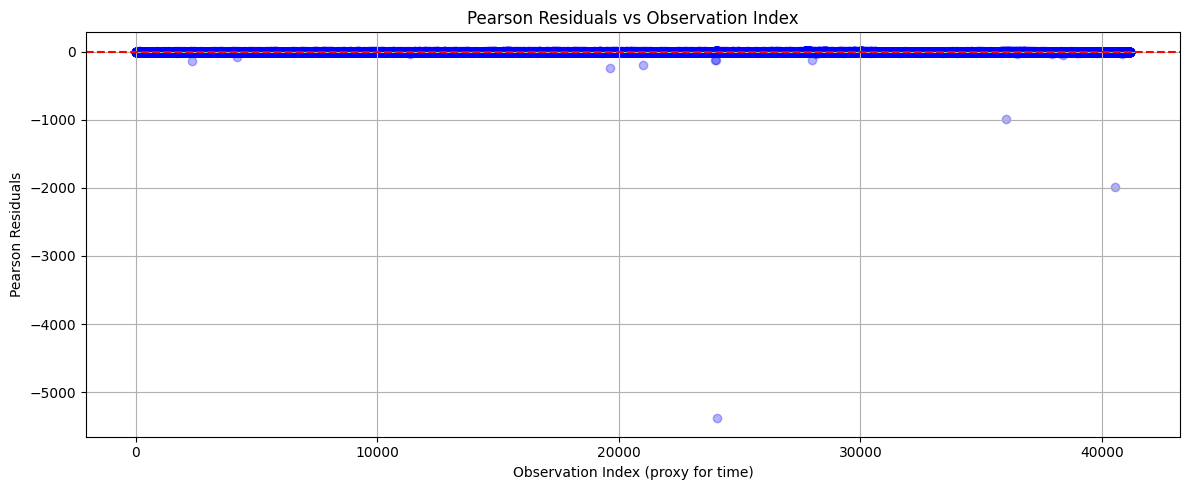

In [23]:
# predictors and response
X = df.drop(columns='y')
y = df['y']

# Add constant to the model
X_const = sm.add_constant(X)

# Fit logistic regression model
model = sm.Logit(y, X_const).fit(disp=False)

# Predict probabilities and compute Pearson residuals
y_pred_prob = model.predict(X_const)
residuals_pearson = (y - y_pred_prob) / np.sqrt(y_pred_prob * (1 - y_pred_prob))

# Plot residuals vs observation index
plt.figure(figsize=(12, 5))
plt.scatter(range(len(residuals_pearson)), residuals_pearson, alpha=0.3, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Pearson Residuals vs Observation Index")
plt.xlabel("Observation Index (proxy for time)")
plt.ylabel("Pearson Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

Linearity of independent variables and log odds

BOX-TIDWELL TEST

- One of the important assumptions of logistic regression is the linearity of the logit over the continuous covariates. This assumption means that relationships between the continuous predictors and the logit (log odds) is linear.
- The Box-Tidwell transformation (test) can be used to test the linearity in the logit assumption when performing logistic regression.
- It checks whether the logit transform is a linear function of the predictor, effectively adding the non-linear transform of the original predictor as an interaction term to test if this addition made no better prediction.
- A statistically significant p-value of the interaction term in the Box-Tidwell transformation means that the linearity assumption is violated
- If one variable is indeed found to be non-linear, then we can resolve it by incorporating higher order polynomial terms for that variable in the regression analysis to capture the non-linearity (e.g. x^2) .- Another solution to this problem is the categorization of the independent variables. That is transforming metric variables to ordinal level and then including them in the model.

In [ ]:
# numerical columns
numeric_cols = ['age', 'duration', 'campaign', 'previous']

# interaction terms: x * log(x)
for col in numeric_cols:
    safe_col = df[col].apply(lambda x: x if x > 0 else 1e-6)  # avoid log(0) or log(negative)
    df[f'{col}_log'] = df[col] * np.log(safe_col)

# Combine original and interaction terms
X = df[numeric_cols + [f"{col}_log" for col in numeric_cols]]
X = sm.add_constant(X)
y = df['y']

# Fit logistic regression
logit_model = sm.Logit(y, X).fit(disp=0)
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41176
Model:                          Logit   Df Residuals:                    41167
Method:                           MLE   Df Model:                            8
Date:                Wed, 16 Jul 2025   Pseudo R-squ.:                  0.2923
Time:                        15:25:08   Log-Likelihood:                -10258.
converged:                       True   LL-Null:                       -14496.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.7831      0.366     10.350      0.000       3.067       4.500
age             -1.0280      0.040    -25.394      0.000      -1.107      -0.949
duration         0.0313      0.001     36.43

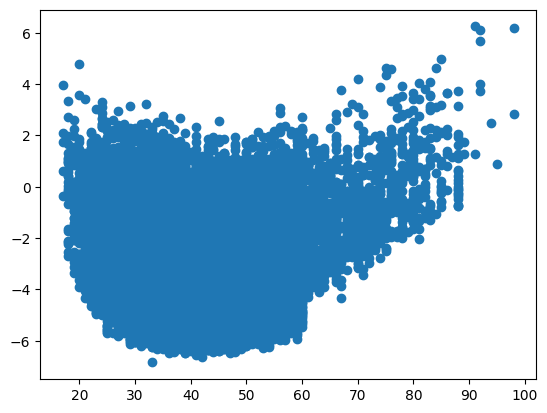

In [ ]:
# Re-run logistic regression on original set of X and y variables
logit_model = sm.Logit(y, X).fit(disp=0)
predicted = logit_model.predict(X)

# Get log odds values
log_odds = np.log(predicted / (1 - predicted))

# Visualize predictor continuous variable vs logit values (Age)
plt.scatter(x=X['age'].values, y=log_odds);
plt.show()

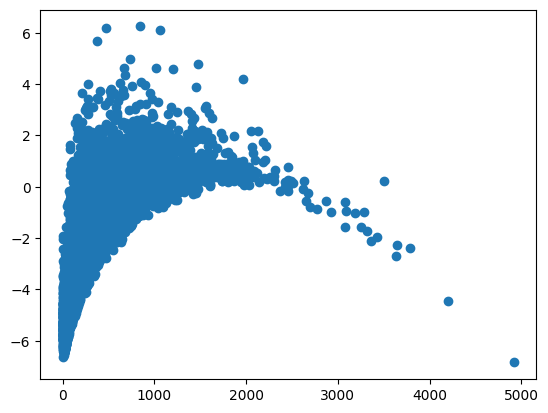

In [ ]:
# Re-run logistic regression on original set of X and y variables
logit_model = sm.Logit(y, X).fit(disp=0)
predicted = logit_model.predict(X)

# Get log odds values
log_odds = np.log(predicted / (1 - predicted))

# Visualize predictor continuous variable vs logit values (Age)
plt.scatter(x=X['duration'].values, y=log_odds);
plt.show()

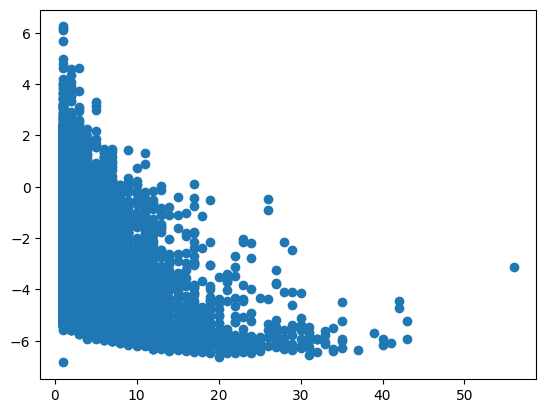

In [ ]:
# Re-run logistic regression on original set of X and y variables
logit_model = sm.Logit(y, X).fit(disp=0)
predicted = logit_model.predict(X)

# Get log odds values
log_odds = np.log(predicted / (1 - predicted))

# Visualize predictor continuous variable vs logit values (Age)
plt.scatter(x=X['campaign'].values, y=log_odds);
plt.show()

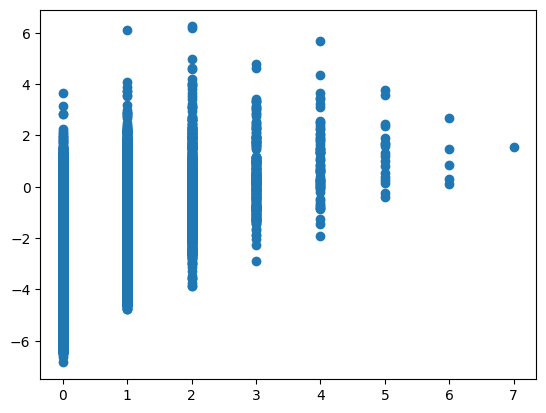

In [ ]:
# Re-run logistic regression on original set of X and y variables
logit_model = sm.Logit(y, X).fit(disp=0)
predicted = logit_model.predict(X)

# Get log odds values
log_odds = np.log(predicted / (1 - predicted))

# Visualize predictor continuous variable vs logit values (Age)
plt.scatter(x=X['previous'].values, y=log_odds);
plt.show()

In [ ]:
# numerical columns
numeric_cols = ['age', 'duration', 'campaign', 'previous']

# interaction terms: x * log(x)
for col in numeric_cols:
    df[f'{col}_squared'] = np.square(df[col].apply(lambda x: x if x >= 0 else 0))

# Combine original and interaction terms
X = df[numeric_cols + [f"{col}_squared" for col in numeric_cols]]
X = sm.add_constant(X)
y = df['y']

# Fit logistic regression
logit_model = sm.Logit(y, X).fit(disp=0) #??
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41176
Model:                          Logit   Df Residuals:                    41167
Method:                           MLE   Df Model:                            8
Date:                Thu, 17 Jul 2025   Pseudo R-squ.:                  0.2835
Time:                        10:55:52   Log-Likelihood:                -10387.
converged:                       True   LL-Null:                       -14496.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1293      0.190     -0.682      0.495      -0.501       0.243
age                 -0.1968      0.009    -23.119      0.000      -0.214      -0.180
duration             0.0069 

In [24]:
# Age Bins
df['age_binned'] = pd.cut(df['age'],
                          bins=[18, 30, 45, 60, 100],
                          labels=['Young', 'Adult', 'Senior', 'Elderly'])

# Duration Bins
df['duration_binned'] = pd.cut(df['duration'],
                                bins=[0, 100, 300, 600, df['duration'].max()],
                                labels=['Short', 'Medium', 'Long', 'Very Long'])

# Campaign Bins
df['campaign_binned'] = pd.cut(df['campaign'],
                                bins=[0, 1, 3, 10, df['campaign'].max()],
                                labels=['Once', 'Few', 'Several', 'Many'])

# Previous Contacts Bins
df['previous_binned'] = pd.cut(df['previous'],
                                bins=[-1, 0, 1, 3, df['previous'].max()],
                                labels=['None', 'One', 'Few', 'Many'])


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   age                            41176 non-null  int64   
 1   month                          41176 non-null  int64   
 2   day_of_week                    41176 non-null  int64   
 3   duration                       41176 non-null  int64   
 4   campaign                       41176 non-null  int64   
 5   previous                       41176 non-null  int64   
 6   cons.price.idx                 41176 non-null  float64 
 7   cons.conf.idx                  41176 non-null  float64 
 8   euribor3m                      41176 non-null  float64 
 9   job_blue-collar                41176 non-null  int64   
 10  job_entrepreneur               41176 non-null  int64   
 11  job_housemaid                  41176 non-null  int64   
 12  job_management                 4

In [26]:
# Separate features and target
target = df["y"]
features = df.drop("y", axis=1)

# Identify categorical and numerical columns
categorical_cols = features.select_dtypes(include=["category"]).columns
numerical_cols = features.drop(columns=categorical_cols)
# One-hot encode categorical columns and convert to int (0/1)
encoded_cats = pd.get_dummies(features[categorical_cols], drop_first=True).astype(int)

# Combine numerical + encoded
X_encoded = pd.concat([numerical_cols, encoded_cats], axis=1)

# Optional: add target back
df = pd.concat([X_encoded, target], axis=1)

# Confirm types
print(df.head())

   age  month  day_of_week  duration  campaign  previous  cons.price.idx  \
0   56      5            1       261         1         0          93.994   
1   57      5            1       149         1         0          93.994   
2   37      5            1       226         1         0          93.994   
3   40      5            1       151         1         0          93.994   
4   56      5            1       307         1         0          93.994   

   cons.conf.idx  euribor3m  job_blue-collar  ...  duration_binned_Medium  \
0          -36.4      4.857                0  ...                       1   
1          -36.4      4.857                0  ...                       1   
2          -36.4      4.857                0  ...                       1   
3          -36.4      4.857                0  ...                       1   
4          -36.4      4.857                0  ...                       0   

   duration_binned_Long  duration_binned_Very Long  campaign_binned_Few  \
0    

In [27]:
df.drop(columns=['age', 'duration', 'campaign', 'previous'], inplace=True)

In [28]:
print(df.head())

   month  day_of_week  cons.price.idx  cons.conf.idx  euribor3m  \
0      5            1          93.994          -36.4      4.857   
1      5            1          93.994          -36.4      4.857   
2      5            1          93.994          -36.4      4.857   
3      5            1          93.994          -36.4      4.857   
4      5            1          93.994          -36.4      4.857   

   job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0                0                 0              1               0   
1                0                 0              0               0   
2                0                 0              0               0   
3                0                 0              0               0   
4                0                 0              0               0   

   job_retired  ...  duration_binned_Medium  duration_binned_Long  \
0            0  ...                       1                     0   
1            0  ...             

No strongly influential outliers ( NOT REQUIRED IF YOU CONVERT ALL COLUMNS INTO CATEGORICAL )

- Influential values are extreme individual data points that can alter the quality of the logistic regression model.
- Cook’s Distance is an estimate of the influence of a data point. It takes into account both the leverage and residual of each observation. Cook’s Distance is a summary of how much a regression model changes when the ith observation is removed.
- A general rule of thumb is that any observation with a Cook’s distance greater than 4/n (where n = total observations) is considered to be influential, though there are even more generic cutoff values of > 0.5-1.0.
- For outliers, we can use the absolute standardized residuals to identify them (std resid > 3)

In [ ]:
'''from scipy import stats

# Get influence measures
logit_model = sm.Logit(y, X).fit(disp=0)
influence = logit_model.get_influence()

# Obtain summary df of influence measures
summ_df = influence.summary_frame()

# Filter summary df to Cook distance
diagnosis_df = summ_df.loc[:,['cooks_d']]

# Append absolute standardized residual values
diagnosis_df['std_resid'] = stats.zscore(logit_model.resid_pearson)
diagnosis_df['std_resid'] = diagnosis_df.loc[:,'std_resid'].apply(lambda x: np.abs(x))

# Sort by Cook's Distance
diagnosis_df.sort_values("cooks_d", ascending=False)
diagnosis_df'''

,cooks_d,std_resid
0,5.740005e-08,0.006426
1,5.147681e-09,0.007243
2,1.473977e-08,0.006736
3,1.863521e-08,0.006825
4,3.764978e-08,0.006392
...,...,...
41171,1.979343e-04,0.039745
41172,2.137703e-05,0.003123
41173,1.345847e-05,0.001628
41174,1.362208e-04,0.037708


In [ ]:
'''# Set Cook's distance threshold
cook_threshold = 4 / len(X)
print(f"Threshold for Cook Distance = {cook_threshold}")'''

Threshold for Cook Distance = 9.714396735962697e-05


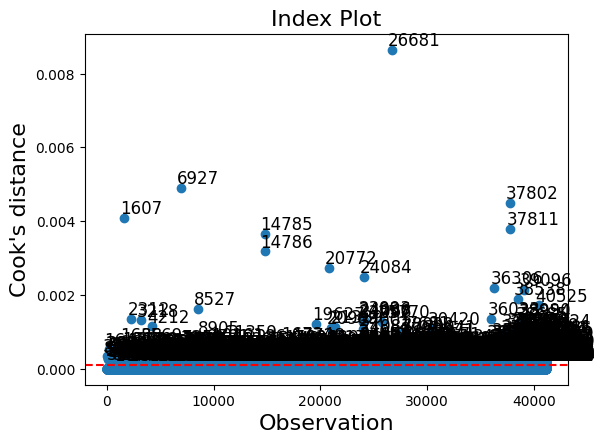

In [ ]:
'''# Plot influence measures (Cook's distance)
fig = influence.plot_index(y_var="cooks", threshold=cook_threshold)
plt.axhline(y=cook_threshold, ls="--", color='red')
fig.tight_layout(pad=2)'''

In [ ]:
'''# Find number of observations that exceed Cook's distance threshold
outliers = diagnosis_df[diagnosis_df['cooks_d'] > cook_threshold]
prop_outliers = round(100*(len(outliers) / len(X)),1)
print(f'Proportion of data points that are highly influential = {prop_outliers}%')'''

Proportion of data points that are highly influential = 8.8%


In [ ]:
'''# Find number of observations which are BOTH outlier (std dev > 3) and highly influential
extreme = diagnosis_df[(diagnosis_df['cooks_d'] > cook_threshold) &
                       (diagnosis_df['std_resid'] > 3)]
prop_extreme = round(100*(len(extreme) / len(X)),1)
print(f'Proportion of highly influential outliers = {prop_extreme}%')'''

Proportion of highly influential outliers = 0.0%


# **--------  MODEL  --------**

In [31]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 9.4 MB/s eta 0:00:00


In [35]:
import optuna
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
# Split into Train and Test
X = df.drop(['y'], axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)

In [33]:
def objective(trial):
    penalty = trial.suggest_categorical("penalty", ["l1", "l2", "elasticnet"])
    solver = trial.suggest_categorical("solver", ["liblinear", "saga"])
    C = trial.suggest_float("C", 1e-4, 10.0, log=True)

    # l1_ratio is only used for elasticnet
    l1_ratio = None
    if penalty == "elasticnet":
        l1_ratio = trial.suggest_float("l1_ratio", 0.0, 1.0)

    # Skip incompatible combinations
    if penalty == "l1" and solver not in ["liblinear", "saga"]:
        raise optuna.exceptions.TrialPruned()
    if penalty == "elasticnet" and solver != "saga":
        raise optuna.exceptions.TrialPruned()

    # Create the model
    model = LogisticRegression(
        penalty=penalty,
        solver=solver,
        C=C,
        l1_ratio=l1_ratio,
        max_iter=1000,
        random_state=42
    )

    # Evaluate using cross-validation
    score = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy").mean()
    return score

In [36]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Print best hyperparameters
print("Best hyperparameters:")
print(study.best_params)

[I 2025-07-28 13:30:09,908] A new study created in memory with name: no-name-4fe58cb7-4b41-4a26-8d95-63d19260059c
[I 2025-07-28 13:30:11,090] Trial 0 finished with value: 0.8873406193078324 and parameters: {'penalty': 'l1', 'solver': 'liblinear', 'C': 0.00020327642731835798}. Best is trial 0 with value: 0.8873406193078324.
[I 2025-07-28 13:30:14,058] Trial 1 finished with value: 0.9010018214936248 and parameters: {'penalty': 'l1', 'solver': 'liblinear', 'C': 0.013287399945451491}. Best is trial 1 with value: 0.9010018214936248.
[I 2025-07-28 13:30:53,886] Trial 2 finished with value: 0.9029143897996358 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.0173477403708681}. Best is trial 2 with value: 0.9029143897996358.
[I 2025-07-28 13:33:10,363] Trial 3 finished with value: 0.9052823315118397 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 7.330566071134031}. Best is trial 3 with value: 0.9052823315118397.
[I 2025-07-28 13:34:28,031] Trial 4 finished with value: 0.9052

Best hyperparameters:
{'penalty': 'l1', 'solver': 'liblinear', 'C': 1.5811818230758083}


In [39]:
# Train Logistic Regression
model = LogisticRegression(max_iter=1000, **study.best_params)
model.fit(X_train, y_train)

LogisticRegression(C=1.5811818230758083, max_iter=1000, penalty='l1',
                   solver='liblinear')

In [40]:
#Predict and Evaluate
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(" Classification Report:\n")
print(report)

 Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7308
           1       0.63      0.37      0.47       928

    accuracy                           0.91      8236
   macro avg       0.78      0.67      0.71      8236
weighted avg       0.89      0.91      0.89      8236



Here precision,recall and f1-score are ok for 'y=0'  but it's very low for 'y=1' . So to fix this we have to balance the data.

**-----  BALANCE DATA  -----**

In [41]:
df['y'].value_counts()

,count
y,
0,36537
1,4639


-- COST SENSITIVE LEARING --

In [42]:
custom_weights = {0: 1, 1: 5}

model = LogisticRegression(class_weight=custom_weights, max_iter=1000,**study.best_params)
model.fit(X_train, y_train)

LogisticRegression(C=1.5811818230758083, class_weight={0: 1, 1: 5},
                   max_iter=1000, penalty='l1', solver='liblinear')

In [43]:
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[6411  897]
 [ 166  762]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      7308
           1       0.46      0.82      0.59       928

    accuracy                           0.87      8236
   macro avg       0.72      0.85      0.76      8236
weighted avg       0.92      0.87      0.89      8236



-- UNDERSAMPLING --

In [ ]:
legit = df[df.y== 0]
fraud = df[df.y== 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(36537, 48)
(4639, 48)


In [ ]:
legit_sample = legit.sample(n=4639)

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)
new_dataset.head()

,month,day_of_week,cons.price.idx,cons.conf.idx,euribor3m,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,duration_binned_Medium,duration_binned_Long,duration_binned_Very Long,campaign_binned_Few,campaign_binned_Several,campaign_binned_Many,previous_binned_One,previous_binned_Few,previous_binned_Many,y
25836,11,3,93.200,-42.0,4.120,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
11788,6,5,94.465,-41.8,4.959,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
5627,5,1,93.994,-36.4,4.857,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
16150,7,2,93.918,-42.7,4.961,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26273,11,4,93.200,-42.0,4.076,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
new_dataset['y'].value_counts()

,count
y,
0,4639
1,4639


In [ ]:
# Split into Train and Test
X = new_dataset.drop(['y'], axis=1)

y = new_dataset['y']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
#  Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#Predict and Evaluate
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(" Classification Report:\n")
print(report)

 Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       928
           1       0.84      0.88      0.86       928

    accuracy                           0.86      1856
   macro avg       0.86      0.86      0.86      1856
weighted avg       0.86      0.86      0.86      1856



In [ ]:
#Predict and Evaluate
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(" Classification Report:\n")
print(report)